### Classification Model - Cancer detection model using tensorflow and Keras

In [108]:
## Loading required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Preprocessing steps 
from sklearn.preprocessing import MinMaxScaler

## train test split for model performance test
from sklearn.model_selection import train_test_split

### Laoding Keras Model
from tensorflow.keras.models import Sequential
## Dropout method to turn off certain percentage of neurons  
from tensorflow.keras.layers import Dense, Dropout, Flatten 
## Early stopping method to avoid overfitting ## cutt off based on validation dataset 
from tensorflow.keras.callbacks import EarlyStopping 

## Classification report 
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Checking whether the classes are balanced or unbalanced

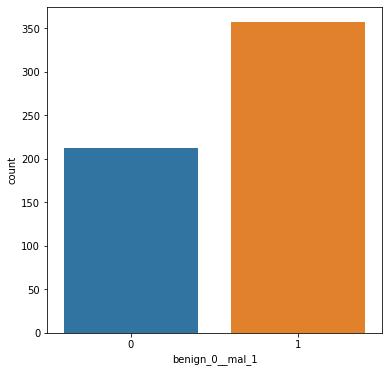

In [151]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'benign_0__mal_1', data=df)

In [12]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

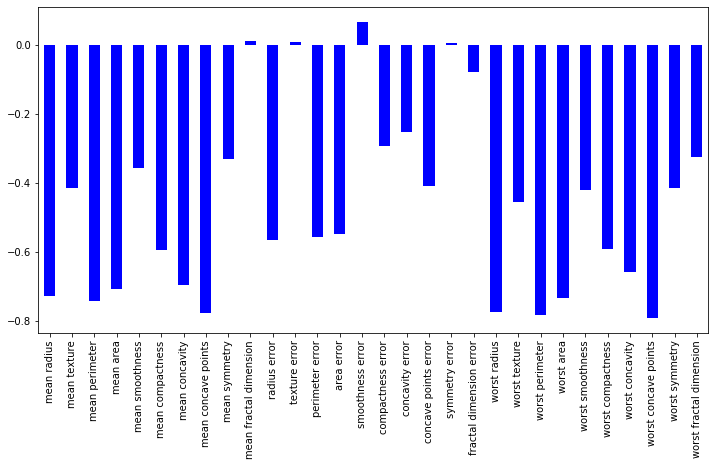

In [25]:
df.corr()['benign_0__mal_1'].drop('benign_0__mal_1').plot(kind = 'bar', figsize = (12,6), color = 'b')

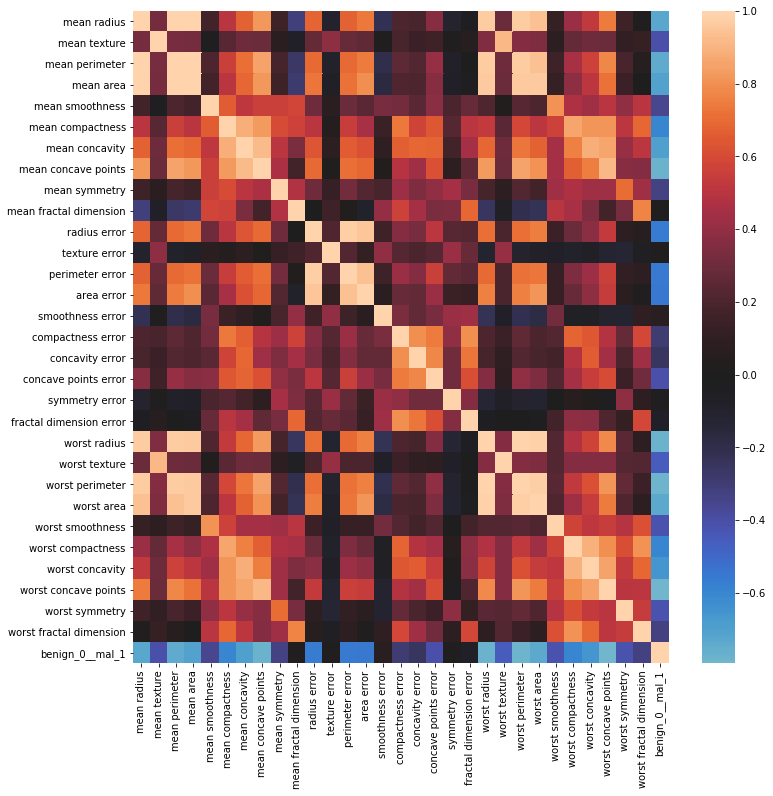

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), center=0)

#### Preprocessing and train and test split

In [75]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [78]:
scaler = MinMaxScaler()

In [79]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
X_train

array([[0.30280346, 0.28779168, 0.28292922, ..., 0.35910653, 0.13207175,
        0.09320478],
       [0.27589412, 0.25160636, 0.25735448, ..., 0.33852234, 0.33609304,
        0.11976912],
       [0.38255296, 0.26885357, 0.36398575, ..., 0.28549828, 0.40114331,
        0.11681753],
       ...,
       [0.44468907, 0.3361515 , 0.42142408, ..., 0.52233677, 0.21387739,
        0.05791683],
       [0.57678947, 0.39634765, 0.55279156, ..., 0.70378007, 0.41671595,
        0.2863702 ],
       [0.32922354, 0.30334799, 0.31402418, ..., 0.44123711, 0.25310467,
        0.23133937]])

In [81]:
X_train

array([[0.30280346, 0.28779168, 0.28292922, ..., 0.35910653, 0.13207175,
        0.09320478],
       [0.27589412, 0.25160636, 0.25735448, ..., 0.33852234, 0.33609304,
        0.11976912],
       [0.38255296, 0.26885357, 0.36398575, ..., 0.28549828, 0.40114331,
        0.11681753],
       ...,
       [0.44468907, 0.3361515 , 0.42142408, ..., 0.52233677, 0.21387739,
        0.05791683],
       [0.57678947, 0.39634765, 0.55279156, ..., 0.70378007, 0.41671595,
        0.2863702 ],
       [0.32922354, 0.30334799, 0.31402418, ..., 0.44123711, 0.25310467,
        0.23133937]])

In [82]:
X_test

array([[0.26317335, 0.29861346, 0.2461044 , ..., 0.29010309, 0.27951902,
        0.11025843],
       [0.34536915, 0.21203923, 0.32136119, ..., 0.25611684, 0.22866154,
        0.11347239],
       [0.29008269, 0.22387555, 0.27070086, ..., 0.28298969, 0.28760103,
        0.09477896],
       ...,
       [0.51954597, 0.46060196, 0.52553979, ..., 0.68591065, 0.14508181,
        0.44182081],
       [0.22696805, 0.28643896, 0.22772692, ..., 0.48659794, 0.21584861,
        0.24701561],
       [0.41680121, 0.38451133, 0.41303892, ..., 0.73333333, 0.28346146,
        0.32638069]])

In [86]:
X_train.shape

(426, 30)

In [88]:
### initializing model
model = Sequential()

### input layer
model.add(Flatten(input_shape = X_train.shape[1:]))


## Hidden layers
model.add(Dense(30, activation= 'relu'))
model.add(Dense(15, activation= 'relu'))

## Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [89]:
model.fit(x=X_train, y = y_train, validation_data=(X_test, y_test), 
         batch_size = 64, epochs = 600)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/step - loss: 0.7172 - val_loss: 0.7090
Epoch 2/600
426/426 [==============================] - 0s 40us/step - loss: 0.6932 - val_loss: 0.6869
Epoch 3/600
426/426 [==============================] - 0s 30us/step - loss: 0.6720 - val_loss: 0.6668
Epoch 4/600
426/426 [==============================] - 0s 33us/step - loss: 0.6514 - val_loss: 0.6451
Epoch 5/600
426/426 [==============================] - 0s 30us/step - loss: 0.6290 - val_loss: 0.6237
Epoch 6/600
426/426 [==============================] - 0s 26us/step - loss: 0.6083 - val_loss: 0.6025
Epoch 7/600
426/426 [==============================] - 0s 33us/step - loss: 0.5866 - val_loss: 0.5810
Epoch 8/600
426/426 [==============================] - 0s 30us/step - loss: 0.5640 - val_loss: 0.5585
Epoch 9/600
426/426 [==============================] - 0s 34us/step - loss: 0.5412 - val_loss: 0.5339
Epoch 10/600
426/426 [===============

426/426 [==============================] - 0s 35us/step - loss: 0.0763 - val_loss: 0.0999
Epoch 81/600
426/426 [==============================] - 0s 35us/step - loss: 0.0747 - val_loss: 0.1002
Epoch 82/600
426/426 [==============================] - 0s 30us/step - loss: 0.0740 - val_loss: 0.1025
Epoch 83/600
426/426 [==============================] - 0s 38us/step - loss: 0.0733 - val_loss: 0.1007
Epoch 84/600
426/426 [==============================] - 0s 47us/step - loss: 0.0725 - val_loss: 0.0992
Epoch 85/600
426/426 [==============================] - 0s 41us/step - loss: 0.0727 - val_loss: 0.0985
Epoch 86/600
426/426 [==============================] - 0s 61us/step - loss: 0.0715 - val_loss: 0.1049
Epoch 87/600
426/426 [==============================] - 0s 56us/step - loss: 0.0711 - val_loss: 0.1010
Epoch 88/600
426/426 [==============================] - 0s 58us/step - loss: 0.0703 - val_loss: 0.1001
Epoch 89/600
426/426 [==============================] - 0s 61us/step - loss: 0.0701 - 

426/426 [==============================] - 0s 33us/step - loss: 0.0525 - val_loss: 0.1065
Epoch 159/600
426/426 [==============================] - ETA: 0s - loss: 0.069 - 0s 33us/step - loss: 0.0531 - val_loss: 0.1042
Epoch 160/600
426/426 [==============================] - 0s 40us/step - loss: 0.0525 - val_loss: 0.1092
Epoch 161/600
426/426 [==============================] - 0s 37us/step - loss: 0.0524 - val_loss: 0.1111
Epoch 162/600
426/426 [==============================] - 0s 35us/step - loss: 0.0525 - val_loss: 0.1104
Epoch 163/600
426/426 [==============================] - 0s 33us/step - loss: 0.0517 - val_loss: 0.1080
Epoch 164/600
426/426 [==============================] - 0s 35us/step - loss: 0.0543 - val_loss: 0.1052
Epoch 165/600
426/426 [==============================] - 0s 35us/step - loss: 0.0557 - val_loss: 0.1173
Epoch 166/600
426/426 [==============================] - 0s 56us/step - loss: 0.0516 - val_loss: 0.1033
Epoch 167/600
426/426 [==============================]

426/426 [==============================] - 0s 40us/step - loss: 0.0447 - val_loss: 0.1216
Epoch 237/600
426/426 [==============================] - 0s 50us/step - loss: 0.0438 - val_loss: 0.1173
Epoch 238/600
426/426 [==============================] - 0s 42us/step - loss: 0.0438 - val_loss: 0.1179
Epoch 239/600
426/426 [==============================] - 0s 42us/step - loss: 0.0436 - val_loss: 0.1214
Epoch 240/600
426/426 [==============================] - 0s 37us/step - loss: 0.0442 - val_loss: 0.1139
Epoch 241/600
426/426 [==============================] - 0s 35us/step - loss: 0.0437 - val_loss: 0.1253
Epoch 242/600
426/426 [==============================] - 0s 61us/step - loss: 0.0437 - val_loss: 0.1174
Epoch 243/600
426/426 [==============================] - 0s 52us/step - loss: 0.0431 - val_loss: 0.1217
Epoch 244/600
426/426 [==============================] - 0s 54us/step - loss: 0.0431 - val_loss: 0.1202
Epoch 245/600
426/426 [==============================] - 0s 44us/step - loss: 

426/426 [==============================] - 0s 41us/step - loss: 0.0376 - val_loss: 0.1383
Epoch 315/600
426/426 [==============================] - 0s 37us/step - loss: 0.0365 - val_loss: 0.1313
Epoch 316/600
426/426 [==============================] - 0s 42us/step - loss: 0.0383 - val_loss: 0.1233
Epoch 317/600
426/426 [==============================] - 0s 44us/step - loss: 0.0352 - val_loss: 0.1403
Epoch 318/600
426/426 [==============================] - 0s 52us/step - loss: 0.0365 - val_loss: 0.1327
Epoch 319/600
426/426 [==============================] - 0s 37us/step - loss: 0.0355 - val_loss: 0.1349
Epoch 320/600
426/426 [==============================] - 0s 40us/step - loss: 0.0354 - val_loss: 0.1293
Epoch 321/600
426/426 [==============================] - 0s 40us/step - loss: 0.0362 - val_loss: 0.1361
Epoch 322/600
426/426 [==============================] - 0s 42us/step - loss: 0.0361 - val_loss: 0.1254
Epoch 323/600
426/426 [==============================] - 0s 40us/step - loss: 

Epoch 393/600
426/426 [==============================] - 0s 59us/step - loss: 0.0311 - val_loss: 0.1356
Epoch 394/600
426/426 [==============================] - 0s 47us/step - loss: 0.0293 - val_loss: 0.1601
Epoch 395/600
426/426 [==============================] - 0s 43us/step - loss: 0.0285 - val_loss: 0.1334
Epoch 396/600
426/426 [==============================] - 0s 54us/step - loss: 0.0280 - val_loss: 0.1350
Epoch 397/600
426/426 [==============================] - 0s 35us/step - loss: 0.0282 - val_loss: 0.1404
Epoch 398/600
426/426 [==============================] - 0s 30us/step - loss: 0.0276 - val_loss: 0.1388
Epoch 399/600
426/426 [==============================] - 0s 29us/step - loss: 0.0279 - val_loss: 0.1406
Epoch 400/600
426/426 [==============================] - 0s 30us/step - loss: 0.0275 - val_loss: 0.1336
Epoch 401/600
426/426 [==============================] - 0s 35us/step - loss: 0.0277 - val_loss: 0.1342
Epoch 402/600
426/426 [==============================] - 0s 33us

426/426 [==============================] - 0s 30us/step - loss: 0.0217 - val_loss: 0.1547
Epoch 472/600
426/426 [==============================] - 0s 42us/step - loss: 0.0218 - val_loss: 0.1511
Epoch 473/600
426/426 [==============================] - 0s 41us/step - loss: 0.0217 - val_loss: 0.1465
Epoch 474/600
426/426 [==============================] - 0s 35us/step - loss: 0.0217 - val_loss: 0.1568
Epoch 475/600
426/426 [==============================] - 0s 35us/step - loss: 0.0214 - val_loss: 0.1485
Epoch 476/600
426/426 [==============================] - 0s 32us/step - loss: 0.0211 - val_loss: 0.1498
Epoch 477/600
426/426 [==============================] - 0s 35us/step - loss: 0.0210 - val_loss: 0.1492
Epoch 478/600
426/426 [==============================] - 0s 35us/step - loss: 0.0211 - val_loss: 0.1515
Epoch 479/600
426/426 [==============================] - 0s 35us/step - loss: 0.0209 - val_loss: 0.1519
Epoch 480/600
426/426 [==============================] - 0s 35us/step - loss: 

Epoch 550/600
426/426 [==============================] - 0s 44us/step - loss: 0.0159 - val_loss: 0.1611
Epoch 551/600
426/426 [==============================] - 0s 40us/step - loss: 0.0161 - val_loss: 0.1578
Epoch 552/600
426/426 [==============================] - 0s 48us/step - loss: 0.0156 - val_loss: 0.1603
Epoch 553/600
426/426 [==============================] - 0s 37us/step - loss: 0.0156 - val_loss: 0.1536
Epoch 554/600
426/426 [==============================] - 0s 42us/step - loss: 0.0155 - val_loss: 0.1493
Epoch 555/600
426/426 [==============================] - 0s 40us/step - loss: 0.0158 - val_loss: 0.1650
Epoch 556/600
426/426 [==============================] - 0s 40us/step - loss: 0.0149 - val_loss: 0.1506
Epoch 557/600
426/426 [==============================] - 0s 37us/step - loss: 0.0151 - val_loss: 0.1511
Epoch 558/600
426/426 [==============================] - 0s 52us/step - loss: 0.0159 - val_loss: 0.1548
Epoch 559/600
426/426 [==============================] - 0s 40us

In [74]:
X_test.min()
#X_test.max()

-0.0007963033579327511

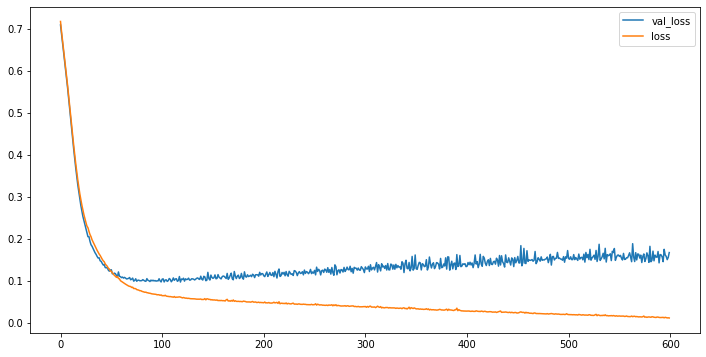

In [92]:
pd.DataFrame(model.history.history).plot(figsize = (12,6))

From the above plot we can clearly see overfitting because training loss is decreasing while validation loss is started increasing after 100 epochs

In [93]:
#help(Dropout)

In [96]:
#help(EarlyStopping)

Using Early stopping to stop the training before Validation loss shoots up. We are keeping the patience level of few epochs to 

In [127]:
early_stopping = EarlyStopping(monitor='val_loss', patience=25, verbose=1, mode='min')

In [128]:
### initializing model
model = Sequential()

### input layer
model.add(Flatten(input_shape = X_train.shape[1:]))


## Hidden layers
model.add(Dense(30, activation= 'relu'))
model.add(Dense(15, activation= 'relu'))

## Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [129]:
model.fit(x=X_train, y = y_train, validation_data=(X_test, y_test), 
          epochs = 600, callbacks = [early_stopping])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/step - loss: 0.6981 - val_loss: 0.6771
Epoch 2/600
426/426 [==============================] - 0s 58us/step - loss: 0.6619 - val_loss: 0.6494
Epoch 3/600
426/426 [==============================] - 0s 82us/step - loss: 0.6331 - val_loss: 0.6138
Epoch 4/600
426/426 [==============================] - 0s 87us/step - loss: 0.5945 - val_loss: 0.5732
Epoch 5/600
426/426 [==============================] - 0s 75us/step - loss: 0.5522 - val_loss: 0.5268
Epoch 6/600
426/426 [==============================] - 0s 63us/step - loss: 0.5052 - val_loss: 0.4783
Epoch 7/600
426/426 [==============================] - 0s 63us/step - loss: 0.4579 - val_loss: 0.4286
Epoch 8/600
426/426 [==============================] - 0s 73us/step - loss: 0.4097 - val_loss: 0.3832
Epoch 9/600
426/426 [==============================] - 0s 75us/step - loss: 0.3668 - val_loss: 0.3403
Epoch 10/600
426/426 [===============

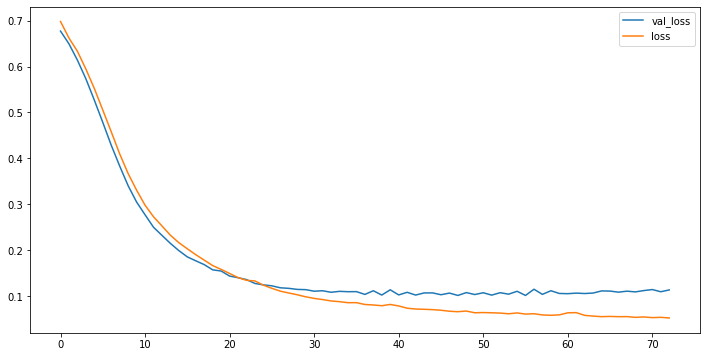

In [130]:
pd.DataFrame(model.history.history).plot(figsize = (12,6))

In [137]:
preds_early_stops = model.predict_classes(X_test)

In [114]:
#preds_early_stops > .5

In [140]:
print('Test data: ')
print('\nClassification Report: ')
print(classification_report(y_test, preds_early_stops))

print('\nConfusion Metric: ')
print(confusion_matrix(y_test, preds_early_stops))

Test data: 

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


Confusion Metric: 
[[54  1]
 [ 3 85]]


#### Dropout:
    Using dropout to reduce overfitting by randoming dropping neurons in the last layer in each epoch to produce cummulative effect 
    > this Dropout(%) of neuron would be off for each batch size since we haven't mentioned batch size here it means that it will happen for complete batch 
    
    > Usually 1 epoch is consist of batch size if batch size 

In [144]:
### initializing model
model1 = Sequential()

### input layer
model1.add(Flatten(input_shape = X_train.shape[1:]))


## Hidden layers : 2 hidden layer 
model1.add(Dense(30, activation= 'relu'))
model1.add(Dropout(rate = .5))  ### Adding dropout for the previous layer 

model1.add(Dense(15, activation= 'relu'))
model1.add(Dropout(rate = .5)) ### Adding dropout for previous layer again 

## Output layer
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [126]:
#X_train.min()
#X_train.max()

1.0

In [145]:
model1.fit(x=X_train, y = y_train, validation_data = (X_test, y_test), 
           callbacks= [early_stopping], epochs=600)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/step - loss: 0.6989 - val_loss: 0.6825
Epoch 2/600
426/426 [==============================] - 0s 68us/step - loss: 0.6912 - val_loss: 0.6663
Epoch 3/600
426/426 [==============================] - 0s 59us/step - loss: 0.6668 - val_loss: 0.6528
Epoch 4/600
426/426 [==============================] - 0s 63us/step - loss: 0.6473 - val_loss: 0.6398
Epoch 5/600
426/426 [==============================] - 0s 56us/step - loss: 0.6458 - val_loss: 0.6263
Epoch 6/600
426/426 [==============================] - 0s 59us/step - loss: 0.6322 - val_loss: 0.6116
Epoch 7/600
426/426 [==============================] - 0s 59us/step - loss: 0.6067 - val_loss: 0.5939
Epoch 8/600
426/426 [==============================] - 0s 60us/step - loss: 0.6177 - val_loss: 0.5794
Epoch 9/600
426/426 [==============================] - 0s 62us/step - loss: 0.5865 - val_loss: 0.5632
Epoch 10/600
426/426 [===============

426/426 [==============================] - 0s 115us/step - loss: 0.1436 - val_loss: 0.1007
Epoch 81/600
426/426 [==============================] - 0s 108us/step - loss: 0.1564 - val_loss: 0.0910
Epoch 82/600
426/426 [==============================] - 0s 105us/step - loss: 0.1340 - val_loss: 0.0903
Epoch 83/600
426/426 [==============================] - 0s 113us/step - loss: 0.1273 - val_loss: 0.0937
Epoch 84/600
426/426 [==============================] - 0s 115us/step - loss: 0.1273 - val_loss: 0.0917
Epoch 85/600
426/426 [==============================] - 0s 119us/step - loss: 0.1117 - val_loss: 0.0886
Epoch 86/600
426/426 [==============================] - 0s 108us/step - loss: 0.1132 - val_loss: 0.0888
Epoch 87/600
426/426 [==============================] - 0s 119us/step - loss: 0.1201 - val_loss: 0.0921
Epoch 88/600
426/426 [==============================] - 0s 112us/step - loss: 0.0996 - val_loss: 0.0896
Epoch 89/600
426/426 [==============================] - 0s 119us/step - loss:

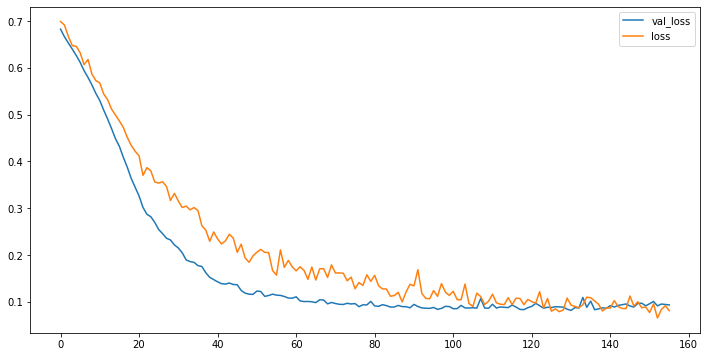

In [146]:
pd.DataFrame(model1.history.history).plot(figsize = (12,6))

In [147]:
preds_drops = model1.predict_classes(X_test)

In [148]:
print('Test data: ')
print('\nClassification Report: ')
print(classification_report(y_test, preds_drops))

print('\nConfusion Metric: ')
print(confusion_matrix(y_test, preds_drops))

Test data: 

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143


Confusion Metric: 
[[54  1]
 [ 2 86]]


#### Thank you :)